<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Problem-Statement" data-toc-modified-id="Problem-Statement-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Problem Statement</a></span></li><li><span><a href="#Data-Source" data-toc-modified-id="Data-Source-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data Source</a></span><ul class="toc-item"><li><span><a href="#Data-Description" data-toc-modified-id="Data-Description-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Data Description</a></span></li></ul></li><li><span><a href="#Importing-the-Libraries" data-toc-modified-id="Importing-the-Libraries-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Importing the Libraries</a></span></li><li><span><a href="#Dataset-Preparation" data-toc-modified-id="Dataset-Preparation-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Dataset Preparation</a></span></li><li><span><a href="#Visualisation" data-toc-modified-id="Visualisation-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Visualisation</a></span><ul class="toc-item"><li><span><a href="#Histograms" data-toc-modified-id="Histograms-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Histograms</a></span></li><li><span><a href="#BoxPlots" data-toc-modified-id="BoxPlots-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>BoxPlots</a></span></li><li><span><a href="#Multicollinearity-of-Features" data-toc-modified-id="Multicollinearity-of-Features-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Multicollinearity of Features</a></span><ul class="toc-item"><li><span><a href="#Pairplot" data-toc-modified-id="Pairplot-5.3.1"><span class="toc-item-num">5.3.1&nbsp;&nbsp;</span>Pairplot</a></span></li><li><span><a href="#Heatmap" data-toc-modified-id="Heatmap-5.3.2"><span class="toc-item-num">5.3.2&nbsp;&nbsp;</span>Heatmap</a></span></li></ul></li><li><span><a href="#Countplot" data-toc-modified-id="Countplot-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Countplot</a></span></li></ul></li><li><span><a href="#Feature-Engineering" data-toc-modified-id="Feature-Engineering-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Feature Engineering</a></span><ul class="toc-item"><li><span><a href="#Handling-Missing-Data" data-toc-modified-id="Handling-Missing-Data-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Handling Missing Data</a></span></li><li><span><a href="#Feature-Importance" data-toc-modified-id="Feature-Importance-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Feature Importance</a></span></li><li><span><a href="#Feature-Scaling" data-toc-modified-id="Feature-Scaling-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Feature Scaling</a></span></li></ul></li><li><span><a href="#Model-Building" data-toc-modified-id="Model-Building-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Model Building</a></span><ul class="toc-item"><li><span><a href="#KNN" data-toc-modified-id="KNN-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>KNN</a></span><ul class="toc-item"><li><span><a href="#Evaluating-the-model-performance" data-toc-modified-id="Evaluating-the-model-performance-7.1.1"><span class="toc-item-num">7.1.1&nbsp;&nbsp;</span>Evaluating the model performance</a></span></li></ul></li><li><span><a href="#XGB-Classifier" data-toc-modified-id="XGB-Classifier-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>XGB Classifier</a></span><ul class="toc-item"><li><span><a href="#Evaluating-the-model-performance" data-toc-modified-id="Evaluating-the-model-performance-7.2.1"><span class="toc-item-num">7.2.1&nbsp;&nbsp;</span>Evaluating the model performance</a></span></li></ul></li><li><span><a href="#Hyperparameter-Tuning" data-toc-modified-id="Hyperparameter-Tuning-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>Hyperparameter Tuning</a></span><ul class="toc-item"><li><span><a href="#Evaluating-the-model-performance" data-toc-modified-id="Evaluating-the-model-performance-7.3.1"><span class="toc-item-num">7.3.1&nbsp;&nbsp;</span>Evaluating the model performance</a></span></li></ul></li></ul></li></ul></div>

# Problem Statement

**Can the data help to classify whether the room is occupied or not ?**

It is a binary classification problem which requires that an observation of environmental factors such as temperature and humidity be used to classify whether a room is occupied or unoccupied.

# Data Source

https://archive.ics.uci.edu/ml/datasets/Occupancy+Detection+

The dataset was collected by monitoring an office with a suite of environmental sensors and using a camera to determine if the room was occupied.

## Data Description

Data is provided with date-time information and six environmental measures taken each minute over multiple days, specifically:

- Temperature in Celsius.
- Relative humidity as a percentage.
- Light measured in lux.
- Carbon dioxide measured in parts per million.
- Humidity ratio, derived from temperature and relative humidity measured in kilograms of water vapor per kilogram of air.
- Occupancy as either 1 for occupied or 0 for not occupied.

# Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

# Dataset Preparation

In [2]:
data1 = pd.read_csv('datatraining.txt')

In [3]:
data2 = pd.read_csv('datatest2.txt')

In [4]:
train = pd.concat([data1,data2])

In [5]:
train.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
2,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
3,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
4,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
5,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


In [6]:
train.shape

(17895, 7)

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17895 entries, 1 to 9752
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           17895 non-null  object 
 1   Temperature    17895 non-null  float64
 2   Humidity       17895 non-null  float64
 3   Light          17895 non-null  float64
 4   CO2            17895 non-null  float64
 5   HumidityRatio  17895 non-null  float64
 6   Occupancy      17895 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 1.1+ MB


In [8]:
train.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,17895.000000,17895.000000,17895.000000,17895.000000,17895.000000,17895.000000
mean,20.827630,27.998747,121.453183,686.479722,0.004258,0.211120
std,1.036616,5.169896,202.207255,313.669585,0.000784,0.408115
min,19.000000,16.745000,0.000000,412.750000,0.002674,0.000000
25%,20.100000,24.890000,0.000000,458.750000,0.003767,0.000000
50%,20.625000,27.793333,0.000000,564.000000,0.004343,0.000000
75%,21.500000,31.856667,217.916667,792.000000,0.004860,0.000000
max,24.390000,39.500000,1581.000000,2076.500000,0.006476,1.000000


In [9]:
test = pd.read_csv('datatest.txt')

In [10]:
test.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
140,2015-02-02 14:19:00,23.7000,26.272,585.200000,749.200000,0.004764,1
141,2015-02-02 14:19:59,23.7180,26.290,578.400000,760.400000,0.004773,1
142,2015-02-02 14:21:00,23.7300,26.230,572.666667,769.666667,0.004765,1
143,2015-02-02 14:22:00,23.7225,26.125,493.750000,774.750000,0.004744,1
144,2015-02-02 14:23:00,23.7540,26.200,488.600000,779.000000,0.004767,1


In [11]:
test.shape

(2665, 7)

In [12]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2665 entries, 140 to 2804
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           2665 non-null   object 
 1   Temperature    2665 non-null   float64
 2   Humidity       2665 non-null   float64
 3   Light          2665 non-null   float64
 4   CO2            2665 non-null   float64
 5   HumidityRatio  2665 non-null   float64
 6   Occupancy      2665 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 166.6+ KB


In [13]:
train = train.drop(labels='date',axis=1)

# Visualisation

## Histograms

Plotting Histograms to view the distribution of variables

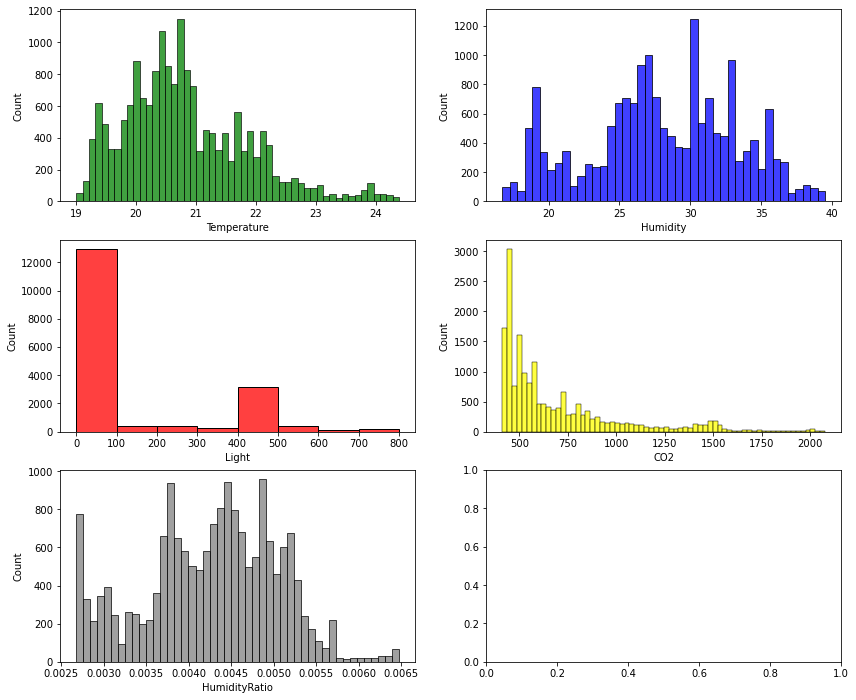

In [14]:
fig, axes = plt.subplots(3, 2, figsize=(14,12))
sns.histplot(data=train['Temperature'], ax=axes[0, 0],color='green')
sns.histplot(data=train['Humidity'], ax=axes[0, 1],color='Blue')
sns.histplot(data=train['Light'], ax=axes[1, 0],color='red',bins=[0,100,200,300,400,500,600,700,800])
sns.histplot(data=train['CO2'], ax=axes[1, 1],color='yellow')
sns.histplot(data=train['HumidityRatio'], ax=axes[2, 0],color='gray')
plt.show()

## BoxPlots

Plotting boxplots to view if there are any outliers present in the data

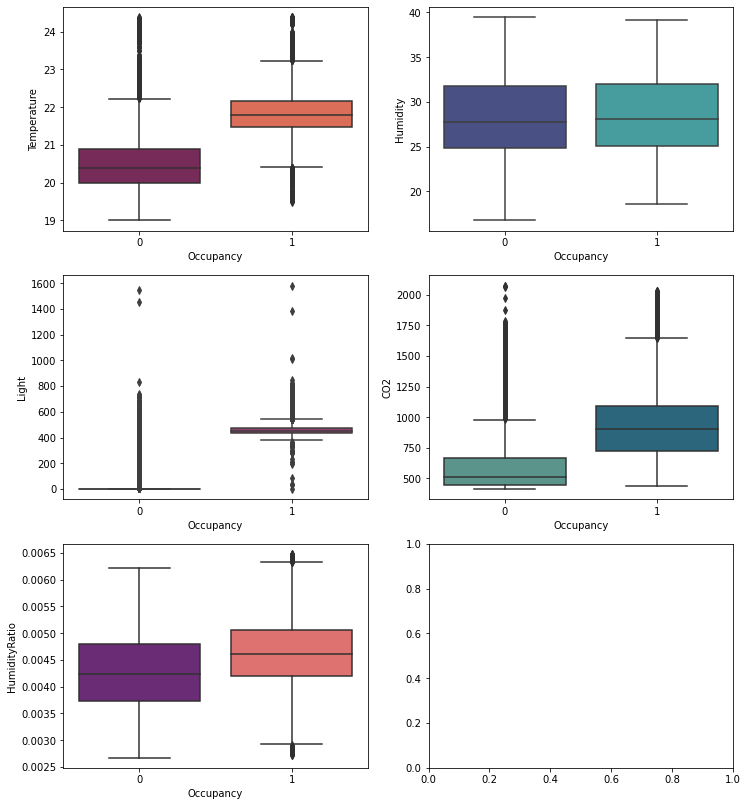

In [15]:
fig, axes = plt.subplots(3, 2, figsize=(12,14))
sns.boxplot(y="Temperature", x= "Occupancy", data=train,  orient='v', ax=axes[0, 0], palette="rocket")
sns.boxplot(y="Humidity", x= "Occupancy", data=train,  orient='v', ax=axes[0, 1], palette="mako")
sns.boxplot(y="Light", x= "Occupancy", data=train,  orient='v', ax=axes[1, 0], palette="flare")
sns.boxplot(y="CO2", x= "Occupancy", data=train,  orient='v', ax=axes[1, 1], palette="crest")
sns.boxplot(y="HumidityRatio", x= "Occupancy", data=train,  orient='v', ax=axes[2, 0], palette="magma")
plt.show()

## Multicollinearity of Features

### Pairplot

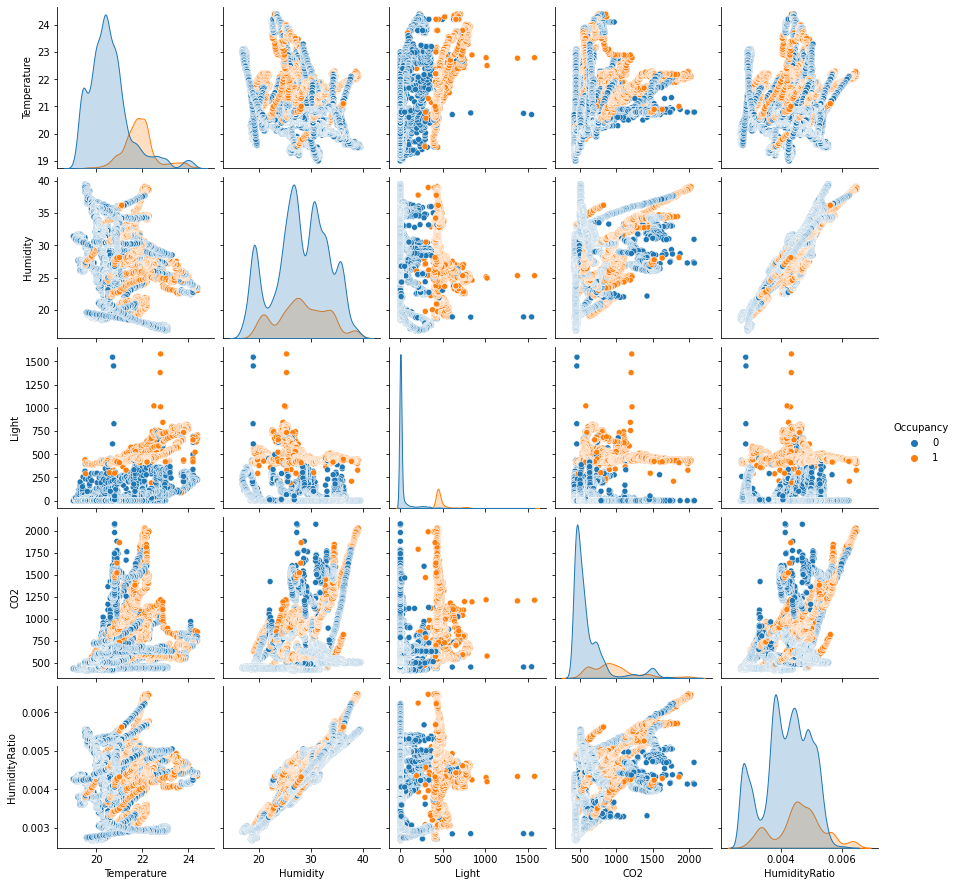

In [16]:
sns.pairplot(train,hue="Occupancy");

### Heatmap

<AxesSubplot:>

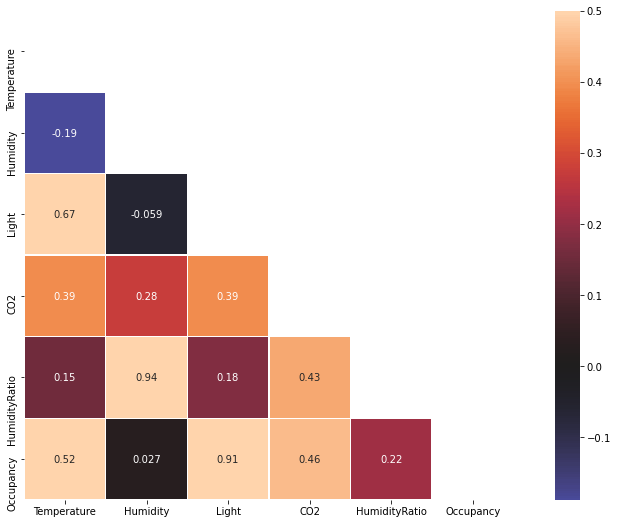

In [17]:
fig = plt.figure(figsize = (15,9))
mask = np.triu(np.ones_like(train.corr(), dtype=bool))
sns.heatmap(train.corr(), mask=mask, vmax=.5, center=0, square=True, linewidths=.5, annot=True)

## Countplot

0    14117
1     3778
Name: Occupancy, dtype: int64


<AxesSubplot:xlabel='Occupancy', ylabel='count'>

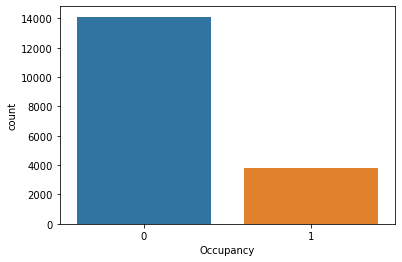

In [18]:
print(train['Occupancy'].value_counts())
sns.countplot(x='Occupancy', data=train)

# Feature Engineering

## Handling Missing Data

In [19]:
print(train.shape)
print(test.shape)

(17895, 6)
(2665, 7)


In [20]:
train.isnull().sum(axis=0)

Temperature      0
Humidity         0
Light            0
CO2              0
HumidityRatio    0
Occupancy        0
dtype: int64

In [21]:
test.isnull().sum(axis=0)

date             0
Temperature      0
Humidity         0
Light            0
CO2              0
HumidityRatio    0
Occupancy        0
dtype: int64

Since, there are no missing values in the datasets, we proceed to create the arrays of independent and dependent features.

In [22]:
X_train=train.iloc[:,:-1] ## independent features
y_train=train.iloc[:,-1] ## dependent features

## Feature Importance

In [23]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X_train,y_train)

ExtraTreesRegressor()

In [24]:
for (i, j) in zip(X_train.columns,model.feature_importances_):
    print(i,":", j)

Temperature : 0.113151971524858
Humidity : 0.01967898236260625
Light : 0.7269809134176274
CO2 : 0.11997264274916407
HumidityRatio : 0.020215489945744302


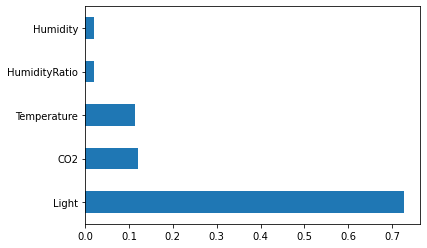

In [25]:
feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feat_importances.nlargest().plot(kind='barh')
plt.show()

## Feature Scaling

In [26]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)

# Model Building

In [27]:
import warnings
warnings.filterwarnings('ignore')

In [28]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('RFR', RandomForestClassifier()))
models.append(('XGB', xgb.XGBClassifier(eval_metric='error')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    #results.append(cv_results)
    #names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.990500 (0.002289)
KNN: 0.994021 (0.001854)
CART: 0.991562 (0.002227)
SVM: 0.990836 (0.002017)
RFR: 0.994077 (0.001770)
XGB: 0.994356 (0.001975)


As per the R2 score, KNN and XGB are the best fitted models on the dataset.

## KNN

In [29]:
test.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
140,2015-02-02 14:19:00,23.7000,26.272,585.200000,749.200000,0.004764,1
141,2015-02-02 14:19:59,23.7180,26.290,578.400000,760.400000,0.004773,1
142,2015-02-02 14:21:00,23.7300,26.230,572.666667,769.666667,0.004765,1
143,2015-02-02 14:22:00,23.7225,26.125,493.750000,774.750000,0.004744,1
144,2015-02-02 14:23:00,23.7540,26.200,488.600000,779.000000,0.004767,1


In [30]:
test = test.drop(labels='date',axis=1)

In [31]:
X_test=test.iloc[:,:-1] ## independent features
y_test=test.iloc[:,-1] ## dependent features

In [32]:
X_test=sc.transform(X_test)

In [33]:
model=KNeighborsClassifier()

In [34]:
model.fit(X_train,y_train)

KNeighborsClassifier()

In [35]:
predictions=model.predict(X_test)

### Evaluating the model performance

In [36]:
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.9196998123827392
[[1672   21]
 [ 193  779]]
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      1693
           1       0.97      0.80      0.88       972

    accuracy                           0.92      2665
   macro avg       0.94      0.89      0.91      2665
weighted avg       0.92      0.92      0.92      2665



## XGB Classifier

In [37]:
model = xgb.XGBClassifier(eval_metric='error')

In [38]:
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='error',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [39]:
predictions=model.predict(X_test)

### Evaluating the model performance

In [40]:
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.9654784240150094
[[1638   55]
 [  37  935]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      1693
           1       0.94      0.96      0.95       972

    accuracy                           0.97      2665
   macro avg       0.96      0.96      0.96      2665
weighted avg       0.97      0.97      0.97      2665



## Hyperparameter Tuning

As seen above, XGBClassifier performs better than KNN, therefore, we will perform Hyperparameter Tuning on XGB.

In [41]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Various learning rate parameters
learning_rate = ['0.05','0.1', '0.2','0.3','0.5','0.6']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]

random_grid = {'n_estimators': n_estimators, 'learning_rate': learning_rate, 'max_depth': max_depth}

In [42]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
xg_random = RandomizedSearchCV(estimator = xgb.XGBClassifier(), param_distributions = random_grid,
                               scoring='neg_mean_squared_error', n_iter = 100, cv = 5, verbose=2, random_state=0, n_jobs = -1)

In [43]:
xg_random.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  9.9min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 14.4min finished


[18:55:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...
                                           scale_pos_weight=None,
                                           subsample=None, tree_method=None,
                                      

In [44]:
xg_random.best_params_

{'n_estimators': 200, 'max_depth': 5, 'learning_rate': '0.05'}

In [45]:
xg_random.best_score_

-0.03593182453199218

In [46]:
predictions=xg_random.predict(X_test)

### Evaluating the model performance

In [47]:
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.973358348968105
[[1639   54]
 [  17  955]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1693
           1       0.95      0.98      0.96       972

    accuracy                           0.97      2665
   macro avg       0.97      0.98      0.97      2665
weighted avg       0.97      0.97      0.97      2665

